---
## Perceptron
#### Author: Tianyi Mao
---

# **Project Summary**

The goal of this project was to predict **student performance** using the **Perceptron Algorithm**. The project aimed to classify students into **High Performance** and **Low Performance** categories based on academic scores and demographic features.

To achieve this, a structured **four-step approach** was followed:

1. **Data Cleaning**  
2. **Model Training**  
3. **Model Evaluation**  
4. **Result Analysis**  


# The **Perceptron Algorithm**

The **Perceptron Algorithm** is a linear classifier that separates two classes using a straight-line boundary.

---

## **Mathematical Representation**

### **1. Compute the weighted sum of the input features:**

The Perceptron calculates a weighted sum of the input features $x$, weights $w$, and bias $b$:

$$
y = f(w \cdot x + b) =
\begin{cases} 
1 & \text{if } w \cdot x + b \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

---

### **2. Update the weights when misclassification occurs:**

If a misclassification occurs, the weights and bias are updated using the following rules:

- Update rule for weights:

$$
w_j \leftarrow w_j + \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot x_j
$$

- Update rule for bias:

$$
b \leftarrow b + \eta \cdot (y_{\text{true}} - y_{\text{pred}})
$$

---

### **Summary of Terms**

- $\eta$: Learning rate (controls the step size for weight updates)  
- $w$: Weights vector  
- $b$: Bias term  
- $x$: Input features vector  
- $y_{\text{true}}$: True class label (0 or 1)  
- $y_{\text{pred}}$: Predicted output from the Perceptron  
- $w_j$: Weight for the $j^{\text{th}}$ input feature  

---



## **Step 1: Data Cleaning**

In this step, we load and explore the dataset to understand its structure. We want to first convert non-numeric columns into numeric values. Then we create target variable to classify students as "high performance(1)" and "low performance(0)" based on average test score. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [29]:
# Load the dataset
performance_data_path = '/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Performance_data/StudentsPerformance.csv'
performance_data = pd.read_csv(performance_data_path)

# Preview the dataset
print(performance_data.head())
print(performance_data.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Compute average score and create binary target variable
performance_data['average score'] = performance_data[['math score', 'reading score', 'writing score']].mean(axis=1)
performance_data['performance'] = performance_data['average score'].apply(lambda x: 1 if x >= 70 else 0)

# Encode categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoder = LabelEncoder()
for col in categorical_features:
    performance_data[col] = encoder.fit_transform(performance_data[col])

# Select features and target
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
            'test preparation course', 'math score', 'reading score', 'writing score']
target = 'performance'

X = performance_data[features]
y = performance_data[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Step 2: Model Training**
In this step, we split dataset into training and testing sets. Then we train the perceptron model using the training data. 

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class CustomPerceptron:
    def __init__(self, eta=0.1, max_iter=1000):
        self.eta = eta  # Learning rate
        self.max_iter = max_iter  # Maximum number of iterations
        self.errors_ = []  # Track errors per epoch

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Initialize weights and bias
        for _ in range(self.max_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi  # Update weights
                self.w_[0] += update  # Update bias
                errors += int(update != 0.0)  # Track misclassifications
            self.errors_.append(errors)  # Store errors for this epoch
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after step function"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [32]:
# Initialize and train the custom Perceptron
clf = CustomPerceptron(eta=0.1, max_iter=50)
clf.fit(X_train, y_train)

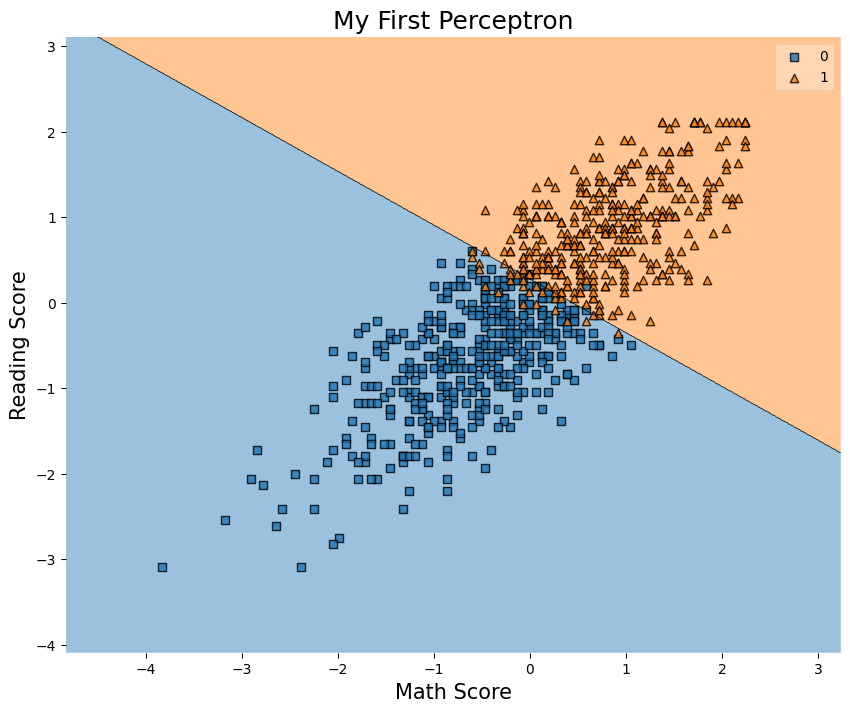

In [ ]:
# Select only two features for visualization
X_train_2D = X_train[:, [5, 6]]  # Select two features (math score and reading score)
y_train_2D = y_train.to_numpy().astype(int)  # Convert to integer NumPy array

# Retrain the perceptron on the reduced feature set
clf_2D = CustomPerceptron(eta=0.1, max_iter=50)
clf_2D.fit(X_train_2D, y_train_2D)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_2D, y_train_2D, clf=clf_2D)
plt.title("My First Perceptron", fontsize=18)
plt.xlabel("Math Score", fontsize=15)
plt.ylabel("Reading Score", fontsize=15)
plt.show()


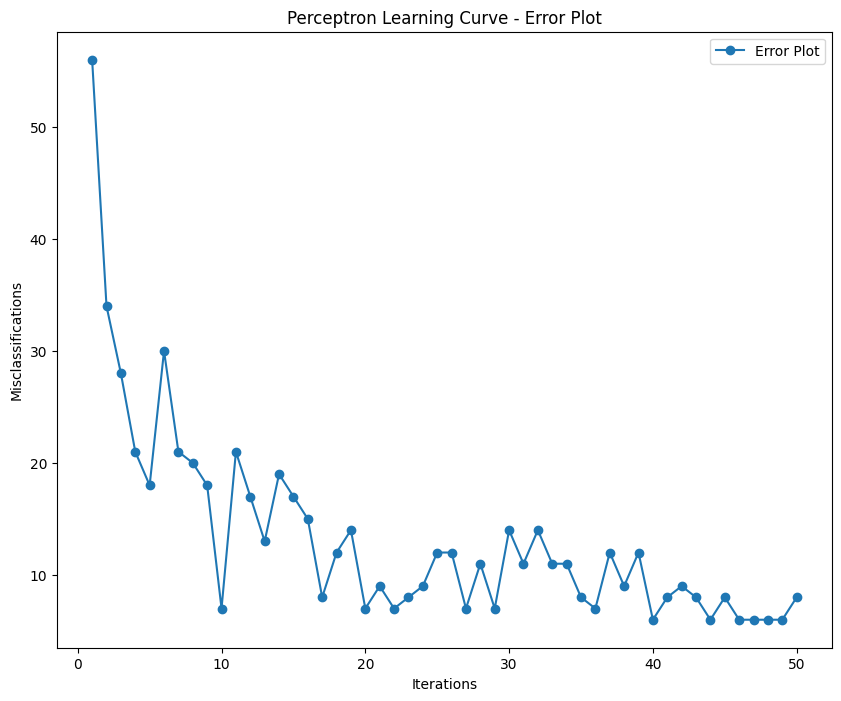

In [ ]:
# Error plot over iterations
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(clf.errors_) + 1), clf.errors_, 
         marker="o", label="Error Plot")
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.title("Perceptron Learning Curve - Error Plot")
plt.legend()
plt.show()


## **Step 3: Model Evaluation**
In this step, we evaluate the trained perceptron model based on the test dataset using accuracy and classification metrics. 

In [35]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = perceptron.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.97      0.98        90

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



## **Step 4: Analyze the Results**
Accuracy score equaling to 0.98 is very high, as well as F1-score and recall, indicating an excellent performance of the perceptron model. 